In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_osomo_3 = pd.read_excel('data/RNA-seq WT-TKO.xlsx', sheet_name='TKO_Osmo3 vs. WT_Osmo3-1')
df_osomo_1 = pd.read_excel('data/RNA-seq WT-TKO.xlsx', sheet_name='TKO_Osmo1 vs. WT_Osmo1-1')
df_aba_1 = pd.read_excel('data/RNA-seq WT-TKO.xlsx', sheet_name='TKO_ABA1 vs. WT_ABA1-1')
df_aba_3 = pd.read_excel('data/RNA-seq WT-TKO.xlsx', sheet_name='TKO_ABA3 vs. WT_ABA3-1')
df_con = pd.read_excel('data/RNA-seq WT-TKO.xlsx', sheet_name='TKO_Cont vs. WT_Cont-1')

/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, a

In [3]:
df_osomo_3

,Name,Chromosome,Region,Identifier,TKO_Osmo3 vs. WT_Osmo3 - Max group means,TKO_Osmo3 vs. WT_Osmo3 - Fold change,TKO_Osmo3 vs. WT_Osmo3 - Log fold change,TKO_Osmo3 vs. WT_Osmo3 - P-value,TKO_Osmo3 vs. WT_Osmo3 - FDR p-value,TKO_Osmo3 vs. WT_Osmo3 - Bonferroni,...,WT_Osmo3-1_S28_R1_001 trimmed (GE) - TPM,WT_Osmo3-1_S28_R1_001 trimmed (GE) - CPM,WT_Osmo3-2_S29_R1_001 trimmed (GE) - Total counts,WT_Osmo3-2_S29_R1_001 trimmed (GE) - RPKM,WT_Osmo3-2_S29_R1_001 trimmed (GE) - TPM,WT_Osmo3-2_S29_R1_001 trimmed (GE) - CPM,WT_Osmo3-3_S30_R1_001 trimmed (GE) - Total counts,WT_Osmo3-3_S30_R1_001 trimmed (GE) - RPKM,WT_Osmo3-3_S30_R1_001 trimmed (GE) - TPM,WT_Osmo3-3_S30_R1_001 trimmed (GE) - CPM
0,AT1G01010,1.0,3631..5899,NaN,6.802473,1.287370,0.364427,0.019620,0.165157,1.0,...,8.020678,9.078526,192.0,5.178862,7.617985,9.143893,220.0,5.723487,8.481304,9.705484
1,AT1G01020,1.0,complement(5928..8737),NaN,4.955066,1.015357,0.021988,0.867210,0.999928,1.0,...,7.675966,9.131003,178.0,4.568482,6.720131,8.477151,206.0,5.099458,7.556593,9.087863
2,AT1G01030,1.0,complement(11649..13714),NaN,1.565120,1.181439,0.240545,0.225096,0.699221,1.0,...,1.848651,2.361466,63.0,1.505744,2.214914,3.000340,57.0,1.313985,1.947118,2.514603
3,AT1G01040,1.0,23146..31227,NaN,9.935824,-1.036335,-0.051491,0.623895,0.999928,1.0,...,15.078793,63.234821,1331.0,9.690044,14.253828,63.388133,1411.0,9.907853,14.681875,62.247448
4,AT1G01046,1.0,28500..28706,NaN,2.425582,1.320884,0.401503,0.350141,0.861956,1.0,...,4.914852,0.682201,4.0,0.879823,1.294199,0.190498,8.0,1.697189,2.514966,0.352927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32394,AT5G67600,5.0,complement(26959569..26960323),NaN,42.185950,-1.071661,-0.099849,0.380571,0.895760,1.0,...,65.142608,23.194847,461.0,39.528647,58.145719,21.954868,519.0,42.922329,63.604118,22.896120
32395,AT5G67610,5.0,complement(26960931..26963638),NaN,7.832088,-1.037933,-0.053714,0.656970,0.999928,1.0,...,12.468033,15.165862,295.0,7.404407,10.891710,14.049211,316.0,7.649979,11.336062,13.940605
32396,AT5G67620,5.0,complement(26964770..26965996),NaN,3.485786,1.076804,0.106756,0.623774,0.999928,1.0,...,4.880882,3.096145,56.0,2.695271,3.964681,2.666969,86.0,3.992250,5.915885,3.793962
32397,AT5G67630,5.0,complement(26967381..26969394),NaN,11.176077,-1.289130,-0.366398,0.008115,0.092644,1.0,...,18.001593,19.941271,374.0,10.307827,15.162573,17.811542,415.0,11.031854,16.347466,18.308073


In [4]:
df_osomo_3.columns

Index(['Name', 'Chromosome', 'Region', 'Identifier',
       'TKO_Osmo3 vs. WT_Osmo3 - Max group means',
       'TKO_Osmo3 vs. WT_Osmo3 - Fold change',
       'TKO_Osmo3 vs. WT_Osmo3 - Log fold change',
       'TKO_Osmo3 vs. WT_Osmo3 - P-value',
       'TKO_Osmo3 vs. WT_Osmo3 - FDR p-value',
       'TKO_Osmo3 vs. WT_Osmo3 - Bonferroni',
       'TKO_Osmo3-1_S13_R1_001 trimmed (GE) - Total counts',
       'TKO_Osmo3-1_S13_R1_001 trimmed (GE) - RPKM',
       'TKO_Osmo3-1_S13_R1_001 trimmed (GE) - TPM',
       'TKO_Osmo3-1_S13_R1_001 trimmed (GE) - CPM',
       'TKO_Osmo3-2_S14_R1_001 trimmed (GE) - Total counts',
       'TKO_Osmo3-2_S14_R1_001 trimmed (GE) - RPKM',
       'TKO_Osmo3-2_S14_R1_001 trimmed (GE) - TPM',
       'TKO_Osmo3-2_S14_R1_001 trimmed (GE) - CPM',
       'TKO_Osmo3-3_S15_R1_001 trimmed (GE) - Total counts',
       'TKO_Osmo3-3_S15_R1_001 trimmed (GE) - RPKM',
       'TKO_Osmo3-3_S15_R1_001 trimmed (GE) - TPM',
       'TKO_Osmo3-3_S15_R1_001 trimmed (GE) - CPM',
       '

In [5]:
tko_osmo = df_osomo_3[['Name','TKO_Osmo3-1_S13_R1_001 trimmed (GE) - TPM','TKO_Osmo3-2_S14_R1_001 trimmed (GE) - TPM','TKO_Osmo3-3_S15_R1_001 trimmed (GE) - TPM','TKO_Osmo3-1_S13_R1_001 trimmed (GE) - CPM','TKO_Osmo3-2_S14_R1_001 trimmed (GE) - CPM','TKO_Osmo3-3_S15_R1_001 trimmed (GE) - CPM']]

In [6]:
wt_osmo = df_osomo_3[['Name','WT_Osmo3-1_S28_R1_001 trimmed (GE) - TPM','WT_Osmo3-2_S29_R1_001 trimmed (GE) - TPM','WT_Osmo3-3_S30_R1_001 trimmed (GE) - TPM','WT_Osmo3-1_S28_R1_001 trimmed (GE) - CPM','WT_Osmo3-2_S29_R1_001 trimmed (GE) - CPM','WT_Osmo3-3_S30_R1_001 trimmed (GE) - CPM']]

In [7]:
df_con

,Name,Chromosome,Region,Identifier,TKO_Cont vs. WT_Cont - Max group means,TKO_Cont vs. WT_Cont - Fold change,TKO_Cont vs. WT_Cont - Log fold change,TKO_Cont vs. WT_Cont - P-value,TKO_Cont vs. WT_Cont - FDR p-value,TKO_Cont vs. WT_Cont - Bonferroni,...,WT_Cont_1_S22_R1_001 trimmed (GE) - TPM,WT_Cont_1_S22_R1_001 trimmed (GE) - CPM,WT_Cont_2_S23_R1_001 trimmed (GE) - Total counts,WT_Cont_2_S23_R1_001 trimmed (GE) - RPKM,WT_Cont_2_S23_R1_001 trimmed (GE) - TPM,WT_Cont_2_S23_R1_001 trimmed (GE) - CPM,WT_Cont_3_S24_R1_001 trimmed (GE) - Total counts,WT_Cont_3_S24_R1_001 trimmed (GE) - RPKM,WT_Cont_3_S24_R1_001 trimmed (GE) - TPM,WT_Cont_3_S24_R1_001 trimmed (GE) - CPM
0,AT1G01010,1.0,3631..5899,NaN,3.962141,-1.202193,-0.265669,0.116659,0.999997,1.0,...,5.981797,7.057723,141.0,3.614986,5.273899,6.237079,149.0,4.064620,5.899845,7.270889
1,AT1G01020,1.0,complement(5928..8737),NaN,5.370491,-1.012449,-0.017849,0.890348,0.999997,1.0,...,8.516944,10.560827,217.0,5.293782,7.723092,9.598908,186.0,4.827980,7.007871,9.076412
2,AT1G01030,1.0,complement(11649..13714),NaN,2.489452,-1.232099,-0.301118,0.088483,0.999997,1.0,...,3.211195,4.275847,124.0,2.816999,4.109716,5.485091,99.0,2.393020,3.473498,4.830993
3,AT1G01040,1.0,23146..31227,NaN,10.635901,-1.072423,-0.100875,0.335273,0.999997,1.0,...,14.236151,62.231604,1549.0,10.718981,15.637908,68.519397,1518.0,11.176866,16.223356,74.075231
4,AT1G01046,1.0,28500..28706,NaN,2.885753,1.021910,0.031268,0.935780,0.999997,1.0,...,4.272622,0.618195,16.0,3.345104,4.880168,0.707754,9.0,2.002066,2.906022,0.439181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32394,AT5G67600,5.0,complement(26959569..26960323),NaN,42.024035,-1.026912,-0.038312,0.735737,0.999997,1.0,...,63.570335,23.594433,461.0,37.572177,54.814003,20.392151,505.0,43.792831,63.565820,24.642946
32395,AT5G67610,5.0,complement(26960931..26963638),NaN,7.741845,-1.016382,-0.023443,0.846052,0.999997,1.0,...,11.823315,14.991223,326.0,7.777504,11.346592,14.420480,281.0,7.133049,10.353706,13.712213
32396,AT5G67620,5.0,complement(26964770..26965996),NaN,4.361913,-1.132742,-0.179819,0.391785,0.999997,1.0,...,5.921149,3.915233,95.0,4.346027,6.340414,4.202287,94.0,4.575546,6.641459,4.587004
32397,AT5G67630,5.0,complement(26967381..26969394),NaN,10.629396,1.002056,0.002963,0.982790,0.999997,1.0,...,19.184123,22.151978,371.0,9.719050,14.179110,16.411037,298.0,8.306391,12.056827,14.541778


In [8]:
print(df_con.columns)
print(len(df_con.columns))

Index(['Name', 'Chromosome', 'Region', 'Identifier',
       'TKO_Cont vs. WT_Cont - Max group means',
       'TKO_Cont vs. WT_Cont - Fold change',
       'TKO_Cont vs. WT_Cont - Log fold change',
       'TKO_Cont vs. WT_Cont - P-value', 'TKO_Cont vs. WT_Cont - FDR p-value',
       'TKO_Cont vs. WT_Cont - Bonferroni',
       'TKO_Cont_1_S7_R1_001 trimmed (GE) - Total counts',
       'TKO_Cont_1_S7_R1_001 trimmed (GE) - RPKM',
       'TKO_Cont_1_S7_R1_001 trimmed (GE) - TPM',
       'TKO_Cont_1_S7_R1_001 trimmed (GE) - CPM',
       'TKO_Cont_2_S8_R1_001 trimmed (GE) - Total counts',
       'TKO_Cont_2_S8_R1_001 trimmed (GE) - RPKM',
       'TKO_Cont_2_S8_R1_001 trimmed (GE) - TPM',
       'TKO_Cont_2_S8_R1_001 trimmed (GE) - CPM',
       'TKO_Cont_3_S9_R1_001 trimmed (GE) - Total counts',
       'TKO_Cont_3_S9_R1_001 trimmed (GE) - RPKM',
       'TKO_Cont_3_S9_R1_001 trimmed (GE) - TPM',
       'TKO_Cont_3_S9_R1_001 trimmed (GE) - CPM',
       'WT_Cont_1_S22_R1_001 trimmed (GE) - Total c

In [9]:
tko_con = df_con[['Name','TKO_Cont_1_S7_R1_001 trimmed (GE) - TPM','TKO_Cont_2_S8_R1_001 trimmed (GE) - TPM','TKO_Cont_3_S9_R1_001 trimmed (GE) - TPM','TKO_Cont_1_S7_R1_001 trimmed (GE) - CPM','TKO_Cont_2_S8_R1_001 trimmed (GE) - CPM','TKO_Cont_3_S9_R1_001 trimmed (GE) - CPM']]

In [10]:
wt_con = df_con[['Name','WT_Cont_1_S22_R1_001 trimmed (GE) - TPM','WT_Cont_2_S23_R1_001 trimmed (GE) - TPM','WT_Cont_3_S24_R1_001 trimmed (GE) - TPM','WT_Cont_1_S22_R1_001 trimmed (GE) - CPM','WT_Cont_2_S23_R1_001 trimmed (GE) - CPM','WT_Cont_3_S24_R1_001 trimmed (GE) - CPM']]

In [11]:
df_wt = pd.merge(wt_con, wt_osmo, how="left", on="Name")
df_tko = pd.merge(tko_con, tko_osmo, how="left", on="Name")

In [12]:
# ’Cont'を含むカラムを抽出
df_wt.loc[:, df_wt.columns.str.match('^(?=.*Cont).*')]

,WT_Cont_1_S22_R1_001 trimmed (GE) - TPM,WT_Cont_2_S23_R1_001 trimmed (GE) - TPM,WT_Cont_3_S24_R1_001 trimmed (GE) - TPM,WT_Cont_1_S22_R1_001 trimmed (GE) - CPM,WT_Cont_2_S23_R1_001 trimmed (GE) - CPM,WT_Cont_3_S24_R1_001 trimmed (GE) - CPM
0,5.981797,5.273899,5.899845,7.057723,6.237079,7.270889
1,8.516944,7.723092,7.007871,10.560827,9.598908,9.076412
2,3.211195,4.109716,3.473498,4.275847,5.485091,4.830993
3,14.236151,15.637908,16.223356,62.231604,68.519397,74.075231
4,4.272622,4.880168,2.906022,0.618195,0.707754,0.439181
...,...,...,...,...,...,...
32394,63.570335,54.814003,63.565820,23.594433,20.392151,24.642946
32395,11.823315,11.346592,10.353706,14.991223,14.420480,13.712213
32396,5.921149,6.340414,6.641459,3.915233,4.202287,4.587004
32397,19.184123,14.179110,12.056827,22.151978,16.411037,14.541778


In [13]:
df_wt['Name']

0        AT1G01010
1        AT1G01020
2        AT1G01030
3        AT1G01040
4        AT1G01046
           ...    
32394    AT5G67600
32395    AT5G67610
32396    AT5G67620
32397    AT5G67630
32398    AT5G67640
Name: Name, Length: 32399, dtype: object

In [14]:
AtARK2 = 'AT1G73660'

In [15]:
df_wt[df_wt['Name'] == AtARK2]

,Name,WT_Cont_1_S22_R1_001 trimmed (GE) - TPM,WT_Cont_2_S23_R1_001 trimmed (GE) - TPM,WT_Cont_3_S24_R1_001 trimmed (GE) - TPM,WT_Cont_1_S22_R1_001 trimmed (GE) - CPM,WT_Cont_2_S23_R1_001 trimmed (GE) - CPM,WT_Cont_3_S24_R1_001 trimmed (GE) - CPM,WT_Osmo3-1_S28_R1_001 trimmed (GE) - TPM,WT_Osmo3-2_S29_R1_001 trimmed (GE) - TPM,WT_Osmo3-3_S30_R1_001 trimmed (GE) - TPM,WT_Osmo3-1_S28_R1_001 trimmed (GE) - CPM,WT_Osmo3-2_S29_R1_001 trimmed (GE) - CPM,WT_Osmo3-3_S30_R1_001 trimmed (GE) - CPM
7393,AT1G73660,28.957314,35.222208,37.287071,79.747122,97.227653,107.257812,31.542178,33.028429,35.923235,83.333523,92.534292,95.951948


In [16]:
df_wt[df_wt['Name'] == AtARK2].loc[:, df_wt.columns.str.match('^(?=.*Cont).*')]

,WT_Cont_1_S22_R1_001 trimmed (GE) - TPM,WT_Cont_2_S23_R1_001 trimmed (GE) - TPM,WT_Cont_3_S24_R1_001 trimmed (GE) - TPM,WT_Cont_1_S22_R1_001 trimmed (GE) - CPM,WT_Cont_2_S23_R1_001 trimmed (GE) - CPM,WT_Cont_3_S24_R1_001 trimmed (GE) - CPM
7393,28.957314,35.222208,37.287071,79.747122,97.227653,107.257812


In [17]:
# 部分検索のAND検索
df_wt[df_wt['Name'] == AtARK2].loc[:, df_wt.columns.str.match('^(?=.*Cont)(?=.*TPM).*')]

,WT_Cont_1_S22_R1_001 trimmed (GE) - TPM,WT_Cont_2_S23_R1_001 trimmed (GE) - TPM,WT_Cont_3_S24_R1_001 trimmed (GE) - TPM
7393,28.957314,35.222208,37.287071


In [18]:
df_wt[df_wt['Name'] == AtARK2].loc[:, df_wt.columns.str.match('^(?=.*Cont)(?=.*TPM).*')].mean(axis=1)

7393    33.822198
dtype: float64

In [19]:
df_wt[df_wt['Name'] == AtARK2].loc[:, df_wt.columns.str.match('^(?=.*Osmo)(?=.*TPM).*')].mean(axis=1)

7393    33.497947
dtype: float64

In [22]:
con_mean = df_wt[df_wt['Name'] == AtARK2].loc[:, df_wt.columns.str.match('^(?=.*Cont)(?=.*TPM).*')].mean(axis=1)
osmo_mean = df_wt[df_wt['Name'] == AtARK2].loc[:, df_wt.columns.str.match('^(?=.*Osmo)(?=.*TPM).*')].mean(axis=1)

In [41]:
type(con_mean)

pandas.core.series.Series

In [46]:
con_mean.values[0]

33.822197699065704

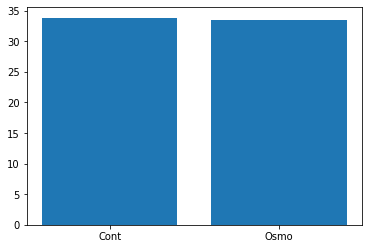

In [45]:
x = ['Cont', 'Osmo']
y = [con_mean.values[0], osmo_mean.values[0]]

plt.bar(x, y)
plt.show()